In [0]:
import pandas as pd
import numpy as np

In [0]:
import os

PROJECT_NYC_Taxi2016='/content/drive/My Drive/Colab Notebooks'
os.mkdir(PROJECT_NYC_Taxi2016)
'''if not os.path.exists(PROJECT_NYC_Taxi2016):
    os.mkdir(NYC_Taxi2016)
    print("Directory " , PROJECT_NYC_Taxi2016 ,  " Created ")
else:    
    print("Directory " , PROJECT_NYC_Taxi2016 ,  " already exists")'''

In [0]:
! unzip '/content/drive/My Drive/Projects_ML_taxi_dataset/nyc-taxi-trip-duration.zip'

Archive:  /content/drive/My Drive/Projects_ML_taxi_dataset/nyc-taxi-trip-duration.zip
replace sample_submission.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.zip   
  inflating: test.zip                
  inflating: train.zip               


In [1]:
! unzip '/content/drive/My Drive/Projects_ML_taxi_dataset/test.zip'
! unzip '/content/drive/My Drive/Projects_ML_taxi_dataset/train.zip'

Archive:  /content/drive/My Drive/Projects_ML_taxi_dataset/test.zip
  inflating: test.csv                
Archive:  /content/drive/My Drive/Projects_ML_taxi_dataset/train.zip
  inflating: train.csv               


In [0]:
df=pd.read_csv('train.csv')

In [5]:
len(df.index)

1458644

In [6]:
np.random.seed(10)
remove_n=10**6+(10**5)*4
drop_indices=np.random.choice(df.index,remove_n,replace=False)
df=df.drop(drop_indices)
df.shape
print(len(df.index))

58644


In [7]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
15,id3319787,1,2016-05-16 15:29:02,2016-05-16 15:32:33,1,-73.955513,40.768593,-73.948761,40.771545,N,211
24,id3321406,2,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.788750,40.641472,N,2485
106,id3277902,1,2016-04-09 15:04:31,2016-04-09 15:11:30,1,-73.973167,40.755699,-73.988655,40.736996,N,419
144,id0561467,1,2016-02-09 06:58:53,2016-02-09 07:12:28,1,-73.972549,40.794018,-73.954056,40.766300,N,815


In [8]:
set(df['passenger_count'])

{0, 1, 2, 3, 4, 5, 6}

In [0]:
df_train=df.iloc[:,2:]

In [10]:
df_train.head()

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
15,2016-05-16 15:29:02,2016-05-16 15:32:33,1,-73.955513,40.768593,-73.948761,40.771545,N,211
24,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.788750,40.641472,N,2485
106,2016-04-09 15:04:31,2016-04-09 15:11:30,1,-73.973167,40.755699,-73.988655,40.736996,N,419
144,2016-02-09 06:58:53,2016-02-09 07:12:28,1,-73.972549,40.794018,-73.954056,40.766300,N,815


In [0]:
df_train=df_train.reset_index(drop=True)

In [13]:
df_train['pickup_datetime']

0        2016-01-19 11:35:24
1        2016-05-16 15:29:02
2        2016-06-03 08:15:05
3        2016-04-09 15:04:31
4        2016-02-09 06:58:53
                ...         
58639    2016-06-25 00:16:02
58640    2016-01-08 12:08:07
58641    2016-05-18 21:39:28
58642    2016-02-16 19:37:38
58643    2016-01-18 20:35:30
Name: pickup_datetime, Length: 58644, dtype: object

In [0]:
for index,row in df_train.iterrows():
  val1=row['pickup_datetime'] # string
  #val2=row['dropoff_datetime'] string
  val3=val1[0:11]  #slicing
  val1=val1[11:] #slicing
  #val2=val2[11:] slicing
  df_train.loc[index,'Day']=val3
  df_train.loc[index,'pickup_time']=val1
  #df_train.loc[index,'dropoff_time']=val2
print(val3)
print(val1)
  
 

In [15]:
df_train.head()

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Day,pickup_time
0,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11:35:24
1,2016-05-16 15:29:02,2016-05-16 15:32:33,1,-73.955513,40.768593,-73.948761,40.771545,N,211,2016-05-16,15:29:02
2,2016-06-03 08:15:05,2016-06-03 08:56:30,1,-73.955231,40.777134,-73.788750,40.641472,N,2485,2016-06-03,08:15:05
3,2016-04-09 15:04:31,2016-04-09 15:11:30,1,-73.973167,40.755699,-73.988655,40.736996,N,419,2016-04-09,15:04:31
4,2016-02-09 06:58:53,2016-02-09 07:12:28,1,-73.972549,40.794018,-73.954056,40.766300,N,815,2016-02-09,06:58:53


In [16]:
#y_train=df_train.loc['trip_duration']
x_train=df_train.drop(['pickup_datetime','dropoff_datetime','trip_duration'],axis=1)
x_train

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,Day,pickup_time
0,1,-73.979027,40.763939,-74.005333,40.710087,N,2016-01-19,11:35:24
1,1,-73.955513,40.768593,-73.948761,40.771545,N,2016-05-16,15:29:02
2,1,-73.955231,40.777134,-73.788750,40.641472,N,2016-06-03,08:15:05
3,1,-73.973167,40.755699,-73.988655,40.736996,N,2016-04-09,15:04:31
4,1,-73.972549,40.794018,-73.954056,40.766300,N,2016-02-09,06:58:53
...,...,...,...,...,...,...,...,...
58639,1,-73.999916,40.734715,-73.987579,40.721313,N,2016-06-25,00:16:02
58640,1,-73.977867,40.754704,-73.982010,40.770699,N,2016-01-08,12:08:07
58641,1,-73.967331,40.788151,-73.963692,40.768349,N,2016-05-18,21:39:28
58642,1,-73.992653,40.753368,-73.971069,40.756809,N,2016-02-16,19:37:38


In [17]:
y_train=df_train['trip_duration']
y_train

0        2124
1         211
2        2485
3         419
4         815
         ... 
58639     861
58640     587
58641     529
58642     838
58643     554
Name: trip_duration, Length: 58644, dtype: int64

In [0]:
x_train['Date']=x_train['Day']

In [20]:
find_day=x_train['Day']
for i in range(len(x_train.index)):
  find_day[i]=find_day[i].replace("-"," ")
x_train.loc['Day']=find_day

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
#x_train=x_train.iloc[:-1,:]
x_train

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,Day,pickup_time,Date
0,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2016 01 19,11:35:24,2016-01-19
1,1.0,-73.955513,40.768593,-73.948761,40.771545,N,2016 05 16,15:29:02,2016-05-16
2,1.0,-73.955231,40.777134,-73.788750,40.641472,N,2016 06 03,08:15:05,2016-06-03
3,1.0,-73.973167,40.755699,-73.988655,40.736996,N,2016 04 09,15:04:31,2016-04-09
4,1.0,-73.972549,40.794018,-73.954056,40.766300,N,2016 02 09,06:58:53,2016-02-09
...,...,...,...,...,...,...,...,...,...
58640,1.0,-73.977867,40.754704,-73.982010,40.770699,N,2016 01 08,12:08:07,2016-01-08
58641,1.0,-73.967331,40.788151,-73.963692,40.768349,N,2016 05 18,21:39:28,2016-05-18
58642,1.0,-73.992653,40.753368,-73.971069,40.756809,N,2016 02 16,19:37:38,2016-02-16
58643,1.0,-73.991081,40.737408,-73.987671,40.722622,N,2016 01 18,20:35:30,2016-01-18


In [0]:
x_train=x_train.iloc[:-1,:]

In [23]:
#here the date is of the format yyyy mm dd
import datetime
date_to_day=x_train['Day'] 
#print(date_to_day[0])
#print(len(date_to_day[2]))
for i in range(len(x_train.index)):
  date=date_to_day[i]
  date=date[:-1]
  day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
  day = datetime.datetime.strptime(date, '%Y %m %d').weekday() 
  date_to_day[i]=day_name[day]
#print(day_name[day]) 
x_train.loc['Day']=date_to_day

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [0]:
'''
date=date_to_day[0]
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
day = datetime.datetime.strptime(date, '%Y %m %d').weekday() 
#date_to_day[i]=day_name[day]
print(day_name[day])
x_train.loc['Day']=date_to_day'''


In [24]:
x_train

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,Day,pickup_time,Date
0,1.0,-73.979027,40.763939,-74.005333,40.710087,N,Tuesday,11:35:24,2016-01-19
1,1.0,-73.955513,40.768593,-73.948761,40.771545,N,Monday,15:29:02,2016-05-16
2,1.0,-73.955231,40.777134,-73.788750,40.641472,N,Friday,08:15:05,2016-06-03
3,1.0,-73.973167,40.755699,-73.988655,40.736996,N,Saturday,15:04:31,2016-04-09
4,1.0,-73.972549,40.794018,-73.954056,40.766300,N,Tuesday,06:58:53,2016-02-09
...,...,...,...,...,...,...,...,...,...
58640,1.0,-73.977867,40.754704,-73.982010,40.770699,N,Friday,12:08:07,2016-01-08
58641,1.0,-73.967331,40.788151,-73.963692,40.768349,N,Wednesday,21:39:28,2016-05-18
58642,1.0,-73.992653,40.753368,-73.971069,40.756809,N,Tuesday,19:37:38,2016-02-16
58643,1.0,-73.991081,40.737408,-73.987671,40.722622,N,Monday,20:35:30,2016-01-18


In [25]:
x_train=x_train.iloc[:-1,:]
x_train

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,Day,pickup_time,Date
0,1.0,-73.979027,40.763939,-74.005333,40.710087,N,Tuesday,11:35:24,2016-01-19
1,1.0,-73.955513,40.768593,-73.948761,40.771545,N,Monday,15:29:02,2016-05-16
2,1.0,-73.955231,40.777134,-73.788750,40.641472,N,Friday,08:15:05,2016-06-03
3,1.0,-73.973167,40.755699,-73.988655,40.736996,N,Saturday,15:04:31,2016-04-09
4,1.0,-73.972549,40.794018,-73.954056,40.766300,N,Tuesday,06:58:53,2016-02-09
...,...,...,...,...,...,...,...,...,...
58639,1.0,-73.999916,40.734715,-73.987579,40.721313,N,Saturday,00:16:02,2016-06-25
58640,1.0,-73.977867,40.754704,-73.982010,40.770699,N,Friday,12:08:07,2016-01-08
58641,1.0,-73.967331,40.788151,-73.963692,40.768349,N,Wednesday,21:39:28,2016-05-18
58642,1.0,-73.992653,40.753368,-73.971069,40.756809,N,Tuesday,19:37:38,2016-02-16


In [26]:
dic={}
dic=x_train['Day'].value_counts()
#day_count=dic.values()
name_of_day=dic.keys()
dic.get(name_of_day)

Friday       9105
Thursday     8863
Saturday     8812
Wednesday    8353
Tuesday      8140
Sunday       7764
Monday       7607
Name: Day, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Cabs Booked')

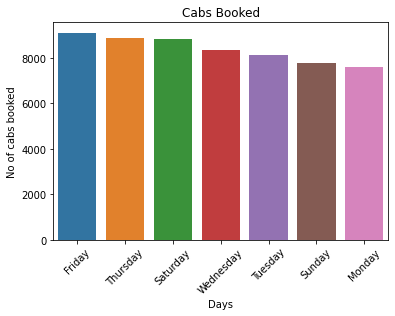

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
graph=sns.barplot(x=name_of_day,y=dic.get(name_of_day))
plt.xticks(rotation=45)
plt.xlabel('Days')
plt.ylabel('No of cabs booked')
plt.title('Cabs Booked')

In [0]:
x_train=x_train.drop(['store_and_fwd_flag'],axis=1)

In [29]:
x_train

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Day,pickup_time,Date
0,1.0,-73.979027,40.763939,-74.005333,40.710087,Tuesday,11:35:24,2016-01-19
1,1.0,-73.955513,40.768593,-73.948761,40.771545,Monday,15:29:02,2016-05-16
2,1.0,-73.955231,40.777134,-73.788750,40.641472,Friday,08:15:05,2016-06-03
3,1.0,-73.973167,40.755699,-73.988655,40.736996,Saturday,15:04:31,2016-04-09
4,1.0,-73.972549,40.794018,-73.954056,40.766300,Tuesday,06:58:53,2016-02-09
...,...,...,...,...,...,...,...,...
58639,1.0,-73.999916,40.734715,-73.987579,40.721313,Saturday,00:16:02,2016-06-25
58640,1.0,-73.977867,40.754704,-73.982010,40.770699,Friday,12:08:07,2016-01-08
58641,1.0,-73.967331,40.788151,-73.963692,40.768349,Wednesday,21:39:28,2016-05-18
58642,1.0,-73.992653,40.753368,-73.971069,40.756809,Tuesday,19:37:38,2016-02-16


In [0]:
#encoding the Day column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x_train['Day']=le.fit_transform(x_train['Day']) 

In [35]:
x_train #the col has been encoded

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Day,pickup_time,Date
0,1.0,-73.979027,40.763939,-74.005333,40.710087,5,11:35:24,2016-01-19
1,1.0,-73.955513,40.768593,-73.948761,40.771545,1,15:29:02,2016-05-16
2,1.0,-73.955231,40.777134,-73.788750,40.641472,0,08:15:05,2016-06-03
3,1.0,-73.973167,40.755699,-73.988655,40.736996,2,15:04:31,2016-04-09
4,1.0,-73.972549,40.794018,-73.954056,40.766300,5,06:58:53,2016-02-09
...,...,...,...,...,...,...,...,...
58639,1.0,-73.999916,40.734715,-73.987579,40.721313,2,00:16:02,2016-06-25
58640,1.0,-73.977867,40.754704,-73.982010,40.770699,0,12:08:07,2016-01-08
58641,1.0,-73.967331,40.788151,-73.963692,40.768349,6,21:39:28,2016-05-18
58642,1.0,-73.992653,40.753368,-73.971069,40.756809,5,19:37:38,2016-02-16


In [0]:
#now we will calculate the total seconds which will be equal to the sum of seconds of pick up and that of the date. 
#This sum will represent the unix time till the specifc time  
x_train['Total_Seconds']=0

In [0]:
import time
import datetime
tot_sec=[]
sec=x_train['pickup_time']
dates=x_train['Date']
for i in range(len(x_train.index)):
  t=sec[i]
  t=t.split(':')
  t=int(t[0])*3600+int(t[1])*60+int(t[2])
  d=dates[i]
  d1=d.split('-')
  d2=datetime.date(int(d1[0]),int(d1[1]),int(d1[2]))
  unixtime = time.mktime(d2.timetuple())
  add=t+int(unixtime)
  tot_sec.append(add)
#len(tot_sec)==len(x_train['Day'])
x_train['Total_Seconds']=tot_sec

In [46]:
#for testing purposes 
'''
time=x_train['pickup_time']
d=time[2]
d=d.split(':')
d=int(d[0])*3600+int(d[1])*60+int(d[2])
print(d)
'''
'''
d = datetime.date(2015,1,5)
unixtime = time.mktime(d.timetuple())
unixtime=int(unixtime)
unixtime'''

1420416000

In [63]:
 x_train

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Day,pickup_time,Date,Total_Seconds
0,1.0,-73.979027,40.763939,-74.005333,40.710087,5,11:35:24,2016-01-19,1453203324
1,1.0,-73.955513,40.768593,-73.948761,40.771545,1,15:29:02,2016-05-16,1463412542
2,1.0,-73.955231,40.777134,-73.788750,40.641472,0,08:15:05,2016-06-03,1464941705
3,1.0,-73.973167,40.755699,-73.988655,40.736996,2,15:04:31,2016-04-09,1460214271
4,1.0,-73.972549,40.794018,-73.954056,40.766300,5,06:58:53,2016-02-09,1455001133
...,...,...,...,...,...,...,...,...,...
58639,1.0,-73.999916,40.734715,-73.987579,40.721313,2,00:16:02,2016-06-25,1466813762
58640,1.0,-73.977867,40.754704,-73.982010,40.770699,0,12:08:07,2016-01-08,1452254887
58641,1.0,-73.967331,40.788151,-73.963692,40.768349,6,21:39:28,2016-05-18,1463607568
58642,1.0,-73.992653,40.753368,-73.971069,40.756809,5,19:37:38,2016-02-16,1455651458


In [0]:
#Now since we have taken and used the values of the col pickup_time and Date , resourcefully. So we will drop them.
#Additional and redundant cols etc is not good for our model .
x_train=x_train.drop(['pickup_time','Date'],axis=1)

In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(random_state=0,n_estimators=1000)

In [67]:
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [68]:
acc=regressor.score(x_train,y_train)
print("Train score: {0:.2f} %".format(100 * acc))

Train score: 85.78 %


In [71]:
'''
import pickle
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(regressor, file)
model_json=regressor.to_json()
with open('model.json','w') as json_file:
  json_file.write(model_json)
  model.save_weights('model_weights.h5')
print('Model saved to disk')
'''
import joblib
filename = 'finalized_model.sav'
joblib.dump(regressor, filename)

['finalized_model.sav']